In [1]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np
np.seterr(all='ignore')
rcParams['figure.figsize'] = (14, 6)
from funcat import * #FUNCAT的同花顺/通达信指标模块：和：&，或：|，其他基本相同。可以使用指标选股！！！
#from pytdx import * #通达信数据更新模块到QUANTAXIS的mongoDB
from tushare import * #TUSHARE数据连接更新。
from rqalpha import * #RQALPHA本地数据连接，通过 rqalpha update_bundle 8点后更新全部数据库
import time
import datetime
n1 = (time.strftime("20%y-%m-%d"))## 20yy-mm-dd格式，输出当日日期
print ("读取当日时间格式n1",n1) #当日时间格式：yyyy-mm-dd
n2 = (time.strftime("20%y%m%d"))## 20yymmdd格式，输出当日日期
print ("读取当日时间格式n2",n2) #当日时间格式：yyyymmdd
def getYesterday(): 
    today=datetime.date.today() 
    oneday=datetime.timedelta(days=1) 
    yesterday=today-oneday  
    return yesterday
n3 = (getYesterday())# 输出前1天日期
print ("读取前一日时间格式n3",n3) #前日时间格式：yyyy-mm-dd
i = datetime.datetime.now()#当前日期
n4 = ("%s%s%s" % (i.year, i.month, i.day) )
print ("读取当日时间格式n4",n4) #当日时间格式：yyyymmdd
n5 = ("%s" % i.isoformat() )
print ("读取当日时间格式n5",n5) #当日时间格式：yyyy-mm-dd:...
n8="20180101"#开始时间
print ("手动设定选股开始时间格式n8",n8)
n9="201801012"#结束时间
print ("手动设定选股结束时间格式n9",n9)
n10="20170101"#设定起始时间
print ("手动设定数据更新设定起始时间格式n10",n10)

x1="000001.XSHG"
print ("设定股票代码",x1)

x2="300334.XSHE"

from funcat.data.tushare_backend import TushareDataBackend
from funcat.data.rqalpha_data_backend import RQAlphaDataBackend
backend = "rqalpha"
if backend == "rqalpha":
    set_data_backend(RQAlphaDataBackend())
elif backend == "tushare":
    set_data_backend(TushareDataBackend())
set_start_date(n10)
S(x1)  # 设置当前关注股票
T(n3)   # 设置当前观察日期
print ("打印 开盘 最高 最低 收盘 成交量",O, H, L, C, V)  # 打印 Open High Low Close
print ("当天涨幅",C / C[1] - 1)  # 当天涨幅
print ("打印60日均线",MA(C, 60))  # 打印60日均线
print ("判断收盘价是否大于60日均线",C > MA(C, 60))  # 判断收盘价是否大于60日均线
print ("30日最高价",HHV(H, 30))  # 30日最高价
print ("最近30日，收盘价 Close 大于60日均线的天数",COUNT(C > MA(C, 60), 30))  # 最近30日，收盘价 Close 大于60日均线的天数
print ("10日均线上穿",CROSS(MA(C, 10), MA(C, 20)))  # 10日均线上穿
print ("最近10天收阳线的天数",COUNT(C > O, 10))  # 最近10天收阳线的天数
print ("最近60天K线实体的最高价",HHV(MAX(O, C), 60))  # 最近60天K线实体的最高价
print ("5日均线上穿10日均线",CROSS(MA(C, 5), MA(C, 10)))  # 5日均线上穿10日均线


读取当日时间格式n1 2018-11-22
读取当日时间格式n2 20181122
读取前一日时间格式n3 2018-11-21
读取当日时间格式n4 20181122
读取当日时间格式n5 2018-11-22T19:43:25.490146
手动设定选股开始时间格式n8 20180101
手动设定选股结束时间格式n9 201801012
手动设定数据更新设定起始时间格式n10 20170101
设定股票代码 000001.XSHG
打印 开盘 最高 最低 收盘 成交量 2619.82 2653.8 2617.78 2651.51 18259644700.0
当天涨幅 0.002139199123155189
打印60日均线 2671.3789999999985
判断收盘价是否大于60日均线 False
30日最高价 2703.51
最近30日，收盘价 Close 大于60日均线的天数 2
10日均线上穿 False
最近10天收阳线的天数 6
最近60天K线实体的最高价 2821.35
5日均线上穿10日均线 False


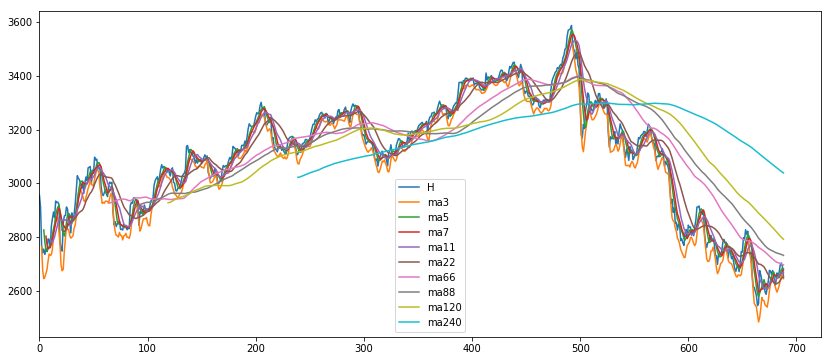

In [2]:
#均线
ax = plt.subplot()
#buy_signal = CROSS(L, LOWER) or CROSS(L,MID)
#sell_signal = CROSS(UPPER,H)
ax.plot(H.series, label="H")
ax.plot(MA(L,3).series, label="ma3")
ax.plot(MA(H,5).series, label="ma5")
ax.plot(MA(H,7).series, label="ma7")
ax.plot(MA(H,11).series, label="ma11")
ax.plot(MA(H,22).series, label="ma22")
ax.plot(MA(H,66).series, label="ma66")
ax.plot(MA(H,88).series, label="ma88")
ax.plot(MA(H,120).series, label="ma120")
ax.plot(MA(H,240).series, label="ma240")
ax.set_xlim(0)
#plt.plot(np.where(buy_signal.series)[0], LOWER.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
#plt.plot(np.where(sell_signal.series)[0], H.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()


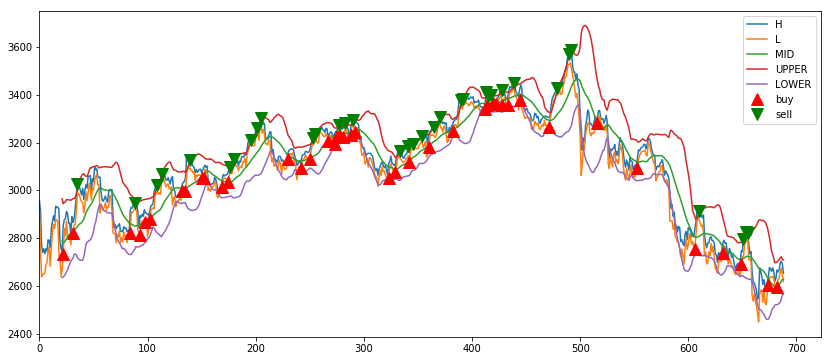

In [3]:
#N=20,P=2 BOLL 布林带
MID = MA((H+L)/2, 22)
UPPER = MID + STD(L, 22) * 2
LOWER = MID - STD(H, 22) * 2
ax = plt.subplot()
buy_signal = CROSS(L, LOWER) or CROSS(L,MID)
sell_signal = CROSS(UPPER,H)
ax.plot(H.series, label="H")
ax.plot(L.series, label="L")
ax.plot(MID.series, label="MID")
ax.plot(UPPER.series, label="UPPER")
ax.plot(LOWER.series, label="LOWER")
ax.set_xlim(0)
plt.plot(np.where(buy_signal.series)[0], L.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], H.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()

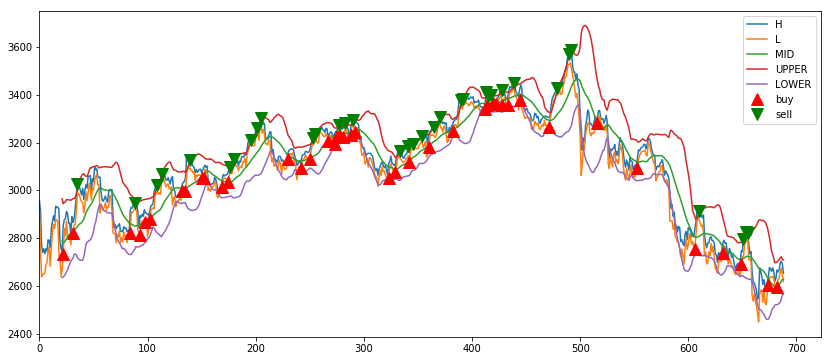

成交市值关系+KDJ显示图及买卖 48457445104860.0 47799732702766.0 23690800723425.867 69.97326020228829 64.75730068018123 80.4051792465024


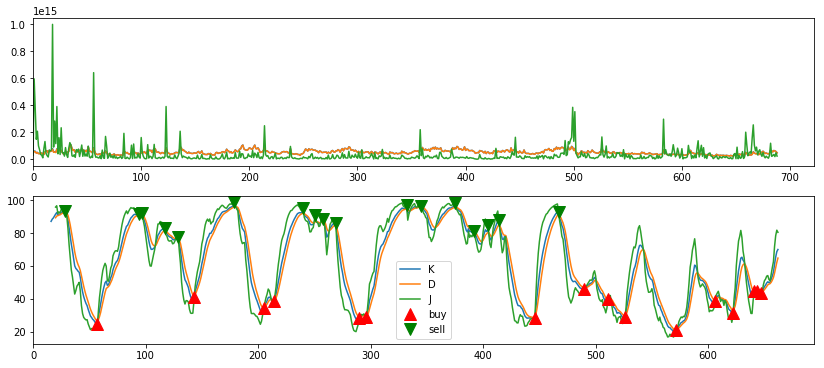

成交量+DMA指标+买卖 -7.003200000000106 -25.879139999999644


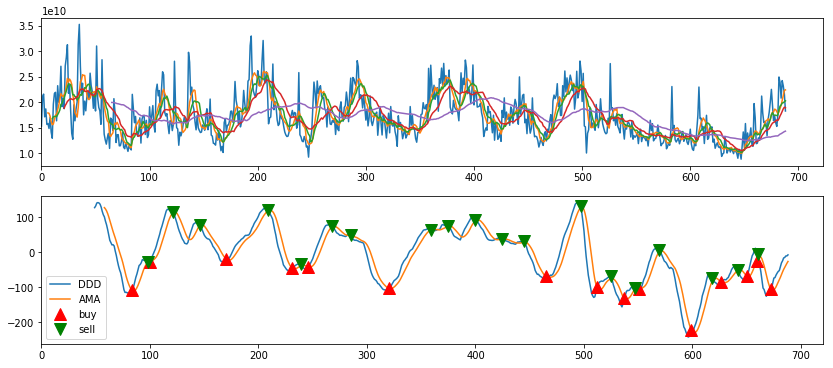

In [4]:
#N=20,P=2 BOLL 布林带
MID = MA((H+L)/2, 22)
UPPER = MID + STD(L, 22) * 2
LOWER = MID - STD(H, 22) * 2
ax = plt.subplot()
buy_signal = CROSS(L, LOWER) or CROSS(L,MID)
sell_signal = CROSS(UPPER,H)
ax.plot(H.series, label="H")
ax.plot(L.series, label="L")
ax.plot(MID.series, label="MID")
ax.plot(UPPER.series, label="UPPER")
ax.plot(LOWER.series, label="LOWER")
ax.set_xlim(0)
plt.plot(np.where(buy_signal.series)[0], L.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], H.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()
#当前股票价格均线+KDJ显示图及买卖
RSV = (HHV(H,1)-LLV(L,27))/(HHV(H,27)-LLV(L,27))*100
K = EMA(RSV, (9 * 2 - 1))
D = EMA(K, (3 * 2 - 1))
J = K * 3 - D * 2
HV=H*V
LV=L*V
HLV=(HV-LV)*(H-L)

print("成交市值关系+KDJ显示图及买卖",HV,LV,HLV,K, D, J)
f1, (ax1, ax2,) = plt.subplots(2, 1)
ax1.plot(HV.series, label="HV")
ax1.plot(LV.series, label="LV")
ax1.plot(HLV.series, label="HLV")
ax1.set_xlim(0)
ax2.plot(K.series, label="K")
ax2.plot(D.series, label="D")
ax2.plot(J.series, label="J")
ax2.set_xlim(0)
buy_signal = (CROSS(IF(D<50,J,D),D) and CROSS(IF(D<50,K,J),D)) #CROSS(J, K)
sell_signal = (CROSS(D,IF(D>70,J,D)) and CROSS(D,IF(D>80,K,J))) #CROSS(K, J)
plt.plot(np.where(buy_signal.series)[0], K.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], J.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()
#当前股票成交量均线+DMA指标+买卖
DDD = MA(CLOSE, 10) - MA(CLOSE, 50)
AMA = MA(DDD, 10)#又叫平行线差指标，是目前股市分析技术指标中的一种中短期指标，它常用于大盘指数和个股的研判。
print("成交量+DMA指标+买卖",DDD, AMA)
f2, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(V.series, label="V")
ax1.plot(MA(V, 7).series, label="ma7")
ax1.plot(MA(V, 11).series, label="ma11")
ax1.plot(MA(V, 22).series, label="ma22")
ax1.plot(MA(V, 66).series, label="ma66")
ax1.set_xlim(0)
ax2.plot(DDD.series, label="DDD")
ax2.plot(AMA.series, label="AMA")
ax2.set_xlim(0)
buy_signal = CROSS(IF(DDD<0,DDD,AMA),AMA) 
sell_signal = CROSS(AMA, DDD)#CROSS(IF(DDD>70,DDD,DDD),DDD) 
plt.plot(np.where(buy_signal.series)[0], AMA.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
plt.plot(np.where(sell_signal.series)[0], DDD.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()



成交量均线+VC -41.35598400307214 -36.68383602903243 -124.5275740179435


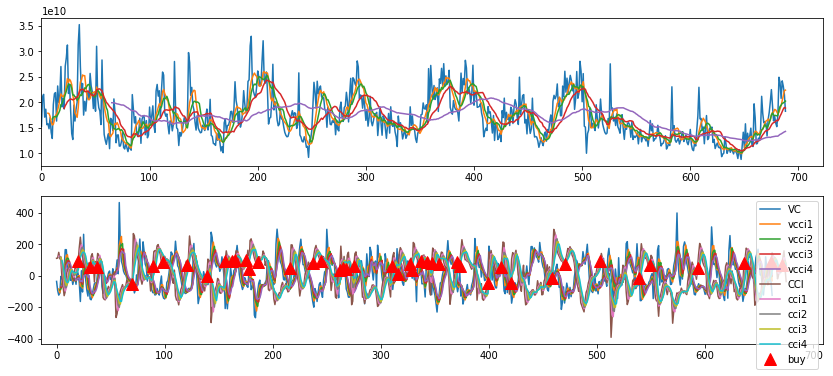

In [5]:
def AVEDEV(value,N):#CCI指标 方差函数模块
    mean = value/N
    for i in range(1,N):
        mean += REF(value,i)/N
    sum_ = ABS(value-mean)
    for i in range(1,N):
        sum_ += ABS(REF(value,i)-mean)    
    return sum_/N
TYP = (H+L+C)/3
CCI = (TYP-MA(TYP,14))/(0.015*AVEDEV(TYP,14))
VCCI = (V-MA(V,14))/(0.015*AVEDEV(V,14))
VC = ((CCI+VCCI)-MA((CCI+VCCI),14))/(0.015*AVEDEV((CCI+VCCI),14))
VV= VC+CCI
print ("成交量均线+VC",VCCI,CCI,VC)
f3, (ax1,ax2) = plt.subplots(2,1)
ax1.plot(V.series, label="V")
ax1.plot(MA(V, 7).series, label="ma7")
ax1.plot(MA(V, 11).series, label="ma11")
ax1.plot(MA(V, 22).series, label="ma22")
ax1.plot(MA(V, 66).series, label="ma66")
ax1.set_xlim(0)
ax2.plot(VC.series, label="VC")
ax2.plot(MA(VC,3).series, label="vcci1")
ax2.plot(MA(VC, 4).series, label="vcci2")
ax2.plot(MA(VC, 5).series, label="vcci3")
ax2.plot(MA(VC, 6).series, label="vcci4")
ax2.plot(CCI.series, label="CCI")
ax2.plot(MA(CCI, 3).series, label="cci1")
ax2.plot(MA(CCI, 4).series, label="cci2")
ax2.plot(MA(CCI, 5).series, label="cci3")
ax2.plot(MA(CCI, 6).series, label="cci4")
ax2.set_xlim(-14)
N1=101
N2=-101
N3=101
buy_signal = CROSS(CCI or VC,N1 or N2)
sell_signal = CROSS(CCI+VC,N1+N2)
plt.plot(np.where(buy_signal.series)[0], CCI.series[np.where(buy_signal.series)[0]], "^", label="buy", markersize=12, color="red")
#plt.plot(np.where(sell_signal.series)[0], CCI.series[np.where(sell_signal.series)[0]], "v", label="sell", markersize=12, color="green")
plt.legend(loc="best")
plt.show()